In [18]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [19]:
X_orig = np.load('../../data/processed_data/specgram_db_pad_trunc.npy')

X_specaug1 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask1.npy')
X_tsh1 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift1.npy')
X_randn1 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise1.npy')
X_tstr1 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch1.npy')

X_specaug2 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask2.npy')
X_tsh2 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift2.npy')
X_randn2 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise2.npy')
X_tstr2 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch2.npy')

X_specaug3 = np.load('../../data/processed_data/augment_data/spec_pt_ftmask3.npy')
X_tsh3 = np.load('../../data/processed_data/augment_data/spec_pt_timeshift3.npy')
X_randn3 = np.load('../../data/processed_data/augment_data/spec_pt_randnoise3.npy')
X_tstr3 = np.load('../../data/processed_data/augment_data/spec_pt_timestretch3.npy')

print(X_orig.shape)

(440, 128, 67)


In [20]:
#choose what to add to the orignal data
X = np.concatenate((X_orig,X_specaug1,X_specaug2), axis=0)
print(X.shape)

df = pd.read_csv("../../data/processed_data/metadata.csv")
category_to_number = {'brushing': 0, 'food': 1, 'isolation': 2}

# Create a new column with numerical values based on the mapping
df['numerical_situation'] = df['situation'].map(category_to_number)

y_orig = df['numerical_situation'].values
y = np.concatenate((y_orig, y_orig, y_orig), axis=0)
print(y.shape)

(1320, 128, 67)
(1320,)


In [21]:
# NEW to CONV nets
## We need to reshape our data to be the correct dimensions for
## the net
## observations, grid, colorvalues

##so we just need to add the colorvalues, 1 here represents single valued
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
print(X.shape)

(1320, 128, 67, 1)


In [22]:
def plottv(history_dict,epochs):
    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
    plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)
    plt.show()


    plt.figure(figsize = (8,6))

    plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
    plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss Function Value", fontsize=12)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.legend(fontsize=12)
    plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                       test_size=.2,
                                                       shuffle=True,
                                                       random_state=100,
                                                       stratify=y)

In [26]:
## Importing the things
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedKFold

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.8506 - accuracy: 0.4943 - val_loss: 31.6272 - val_accuracy: 0.2699
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 29.9955 - accuracy: 0.2784 - val_loss: 16.2818 - val_accuracy: 0.2188
Epoch 3/100
1/1 [==============================] - 3s 3s/step - loss: 15.4742 - accuracy: 0.2273 - val_loss: 2.2206 - val_accuracy: 0.2188
Epoch 4/100
1/1 [==============================] - 4s 4s/step - loss: 2.0861 - accuracy: 0.2273 - val_loss: 1.1390 - val_accuracy: 0.3239
Epoch 5/100
1/1 [==============================] - 3s 3s/step - loss: 1.1344 - accuracy: 0.3878 - val_loss: 1.1036 - val_accuracy: 0.5114
Epoch 6/100
1/1 [==============================] - 3s 3s/step - loss: 1.1138 - accuracy: 0.4957 - val_loss: 1.0445 - val_accuracy: 0.5114
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.0458 - accuracy: 0.4943 - val_loss: 1.0625 - val_accuracy: 0.5114
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 2s 2s/step - loss: 0.3746 - accuracy: 0.8651 - val_loss: 0.5058 - val_accuracy: 0.7955
Epoch 61/100
1/1 [==============================] - 2s 2s/step - loss: 0.3689 - accuracy: 0.8750 - val_loss: 0.4982 - val_accuracy: 0.7784
Epoch 62/100
1/1 [==============================] - 2s 2s/step - loss: 0.3588 - accuracy: 0.8750 - val_loss: 0.5086 - val_accuracy: 0.7699
Epoch 63/100
1/1 [==============================] - 2s 2s/step - loss: 0.3568 - accuracy: 0.8722 - val_loss: 0.4952 - val_accuracy: 0.7983
Epoch 64/100
1/1 [==============================] - 2s 2s/step - loss: 0.3516 - accuracy: 0.8821 - val_loss: 0.5008 - val_accuracy: 0.7926
Epoch 65/100
1/1 [==============================] - 2s 2s/step - loss: 0.3435 - accuracy: 0.8892 - val_loss: 0.4877 - val_accuracy: 0.7926
Epoch 66/100
1/1 [==============================] - 2s 2s/step - loss: 0.3336 - accuracy: 0.8849 - val_loss: 0.4767 - val_accuracy: 0.7983
Epoch 67/100
1/1 [=========

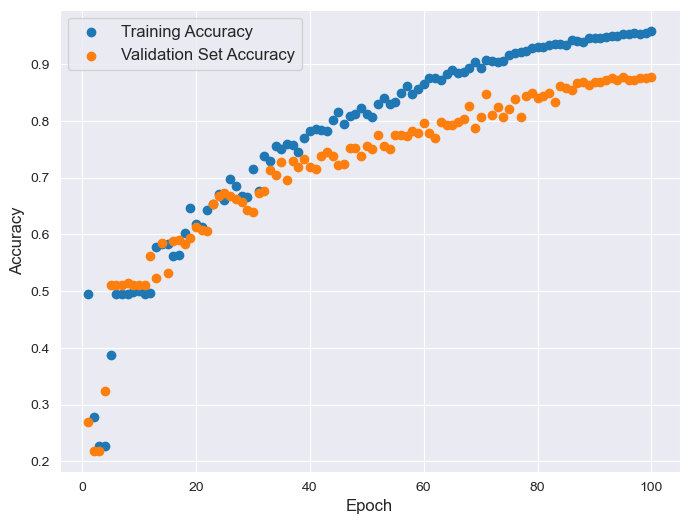

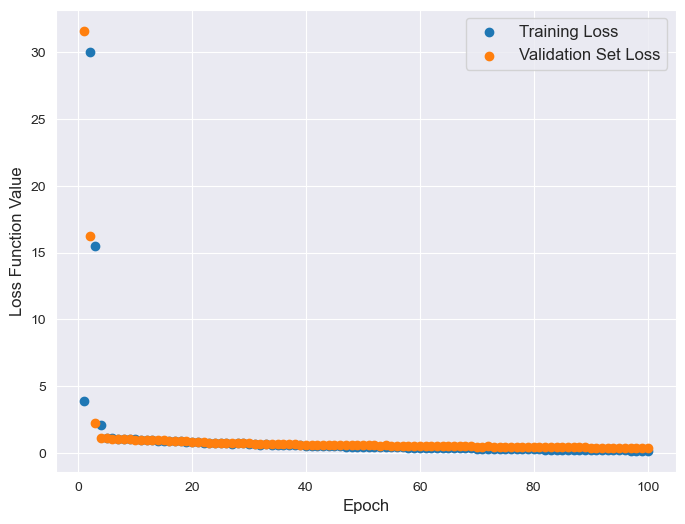

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.8856 - accuracy: 0.2770 - val_loss: 21.7155 - val_accuracy: 0.4886
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 21.5431 - accuracy: 0.5057 - val_loss: 10.3797 - val_accuracy: 0.2386
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 10.7072 - accuracy: 0.2173 - val_loss: 1.9056 - val_accuracy: 0.4375
Epoch 4/100
1/1 [==============================] - 2s 2s/step - loss: 1.9362 - accuracy: 0.4517 - val_loss: 1.4261 - val_accuracy: 0.4886
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.3733 - accuracy: 0.5057 - val_loss: 1.1901 - val_accuracy: 0.5142
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.1431 - accuracy: 0.5298 - val_loss: 1.1372 - val_accuracy: 0.3523
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 1.1048 - accuracy: 0.3679 - val_loss: 1.0882 - val_accuracy: 0.4261
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 2s 2s/step - loss: 0.5203 - accuracy: 0.8040 - val_loss: 0.7323 - val_accuracy: 0.7017
Epoch 61/100
1/1 [==============================] - 2s 2s/step - loss: 0.5111 - accuracy: 0.7685 - val_loss: 0.6786 - val_accuracy: 0.7102
Epoch 62/100
1/1 [==============================] - 2s 2s/step - loss: 0.4943 - accuracy: 0.8068 - val_loss: 0.6716 - val_accuracy: 0.7188
Epoch 63/100
1/1 [==============================] - 2s 2s/step - loss: 0.4873 - accuracy: 0.8068 - val_loss: 0.7089 - val_accuracy: 0.7159
Epoch 64/100
1/1 [==============================] - 2s 2s/step - loss: 0.4887 - accuracy: 0.7812 - val_loss: 0.6552 - val_accuracy: 0.7273
Epoch 65/100
1/1 [==============================] - 3s 3s/step - loss: 0.4823 - accuracy: 0.8139 - val_loss: 0.6721 - val_accuracy: 0.7330
Epoch 66/100
1/1 [==============================] - 2s 2s/step - loss: 0.4665 - accuracy: 0.8097 - val_loss: 0.6671 - val_accuracy: 0.7386
Epoch 67/100
1/1 [=========

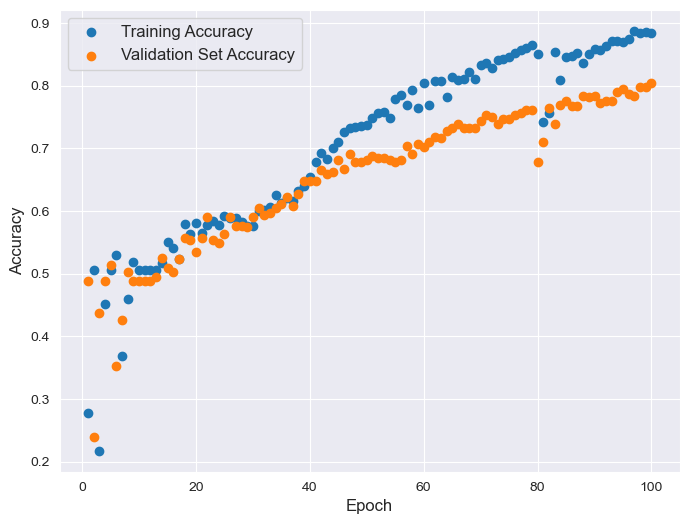

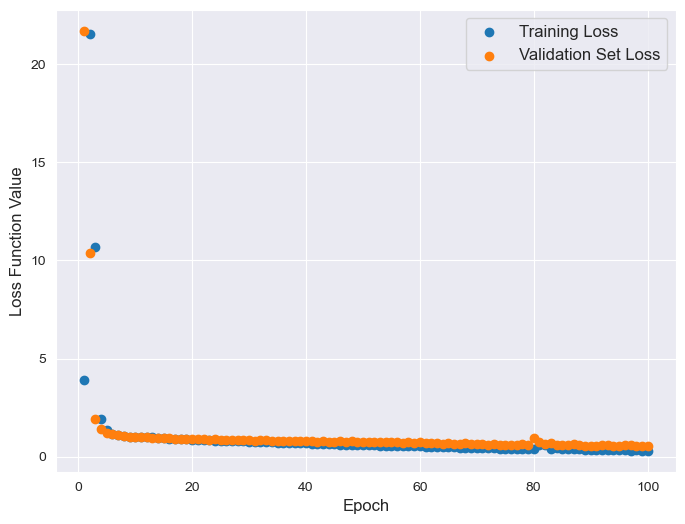

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 3.7837 - accuracy: 0.2273 - val_loss: 15.3176 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 3s 3s/step - loss: 16.1579 - accuracy: 0.5000 - val_loss: 18.0547 - val_accuracy: 0.2841
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 18.7514 - accuracy: 0.2713 - val_loss: 5.2811 - val_accuracy: 0.2841
Epoch 4/100
1/1 [==============================] - 3s 3s/step - loss: 5.4718 - accuracy: 0.2713 - val_loss: 1.0179 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 1.0143 - accuracy: 0.5000 - val_loss: 1.0538 - val_accuracy: 0.4972
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.0422 - accuracy: 0.5000 - val_loss: 1.0327 - val_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 1.0312 - accuracy: 0.5000 - val_loss: 1.0118 - val_accuracy: 0.5000
Epoch 8/100
1/1 [=============

Epoch 60/100
1/1 [==============================] - 2s 2s/step - loss: 0.4744 - accuracy: 0.7997 - val_loss: 0.4808 - val_accuracy: 0.7812
Epoch 61/100
1/1 [==============================] - 3s 3s/step - loss: 0.4366 - accuracy: 0.8168 - val_loss: 0.5038 - val_accuracy: 0.7727
Epoch 62/100
1/1 [==============================] - 2s 2s/step - loss: 0.4514 - accuracy: 0.7940 - val_loss: 0.4941 - val_accuracy: 0.8011
Epoch 63/100
1/1 [==============================] - 2s 2s/step - loss: 0.4445 - accuracy: 0.8068 - val_loss: 0.4845 - val_accuracy: 0.7983
Epoch 64/100
1/1 [==============================] - 2s 2s/step - loss: 0.4322 - accuracy: 0.8153 - val_loss: 0.4774 - val_accuracy: 0.7926
Epoch 65/100
1/1 [==============================] - 2s 2s/step - loss: 0.4233 - accuracy: 0.8182 - val_loss: 0.4600 - val_accuracy: 0.8011
Epoch 66/100
1/1 [==============================] - 2s 2s/step - loss: 0.4126 - accuracy: 0.8281 - val_loss: 0.4555 - val_accuracy: 0.8125
Epoch 67/100
1/1 [=========

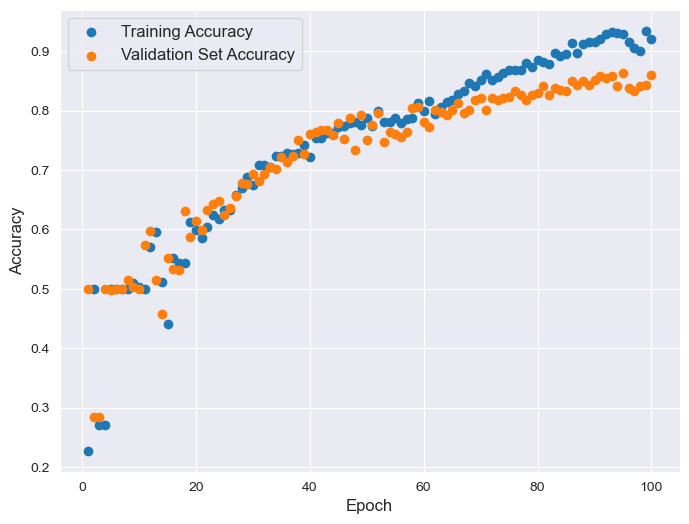

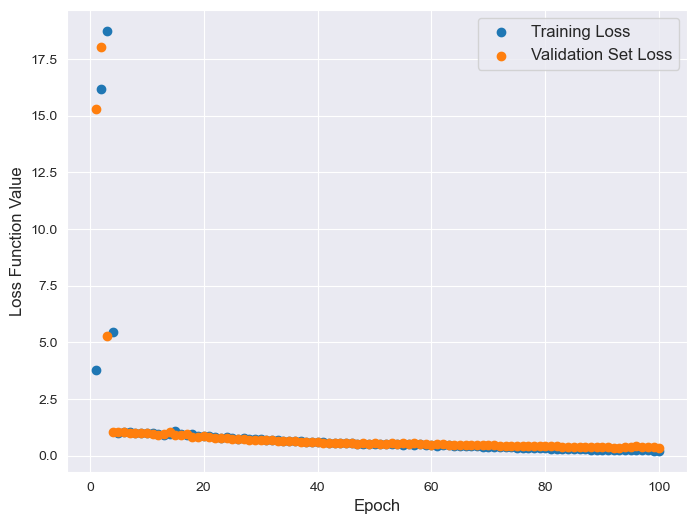

In [27]:
## Cross Validation folds
kfold = StratifiedKFold(3,
                        shuffle=True,
                        random_state=846)
epochs=100

for train_index, test_index in kfold.split(X_train,y_train):
    
    X_tt, X_val = X[train_index], X[test_index]
    y_tt, y_val = y[train_index], y[test_index]
    
    model = models.Sequential()
    model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
    model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
    model.add( layers.Conv2D(64, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    model.add( layers.Conv2D(96, (6,4), activation='relu'))
    model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
    model.add( layers.Flatten() )
    model.add(layers.Dense(45, activation='relu'))

    ## Finally an output layer
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_tt, 
                          to_categorical(y_tt), 
                          epochs=epochs, 
                          batch_size=int(len(y_tt)),
                          validation_data=(X_val,to_categorical(y_val)))
    history_dict = history.history
    plottv(history_dict,epochs)
    

In [ ]:
epochs = 90 ##earlier stop, observed from Cross validation

model = models.Sequential()
model.add( layers.Conv2D(32, (6,4), activation='relu', input_shape=(X.shape[1],X.shape[2],1,) ) )
model.add( layers.MaxPooling2D( (3,2), strides = 2 ) )
model.add( layers.Conv2D(64, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
model.add( layers.Conv2D(96, (6,4), activation='relu'))
model.add( layers.MaxPooling2D( (3,2), strides = 2) )
    
    
model.add( layers.Flatten() )
model.add(layers.Dense(45, activation='relu'))

## Finally an output layer
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train, 
                    to_categorical(y_train), 
                    epochs=epochs, 
                    batch_size=len(y_train)
                    )
#history_dict = history.history
#plottv(history_dict,epochs)

Epoch 1/90
1/1 [==============================] - 4s 4s/step - loss: 3.4075 - accuracy: 0.2188
Epoch 2/90
1/1 [==============================] - 4s 4s/step - loss: 16.9279 - accuracy: 0.5019
Epoch 3/90
1/1 [==============================] - 4s 4s/step - loss: 5.5115 - accuracy: 0.2888
Epoch 4/90
1/1 [==============================] - 4s 4s/step - loss: 1.4721 - accuracy: 0.5019
Epoch 5/90
1/1 [==============================] - 4s 4s/step - loss: 1.1994 - accuracy: 0.5019
Epoch 6/90
1/1 [==============================] - 4s 4s/step - loss: 1.2179 - accuracy: 0.3674
Epoch 7/90
1/1 [==============================] - 4s 4s/step - loss: 1.1133 - accuracy: 0.3371
Epoch 8/90
1/1 [==============================] - 4s 4s/step - loss: 1.0225 - accuracy: 0.5388
Epoch 9/90
1/1 [==============================] - 3s 3s/step - loss: 1.0020 - accuracy: 0.5587
Epoch 10/90
1/1 [==============================] - 3s 3s/step - loss: 0.9935 - accuracy: 0.5114
Epoch 11/90
1/1 [==============================]

1/1 [==============================] - 4s 4s/step - loss: 0.0576 - accuracy: 0.9934
Epoch 87/90


In [ ]:
model.evaluate(X_test,to_categorical(y_test)) ##If want to use this predict new data, use model.predict() after loading the model



In [ ]:
predictions = model.predict(X_test)

In [ ]:
predicted_categ = np.argmax(predictions, axis=1)

# 'predicted_labels' now contains the predicted class indices for each sample
print(predicted_categ)

In [ ]:
predicted_categ-y_test

In [170]:
model.save("/Users/jinjingyi/meow/meow-by-meow/data/trained_models/CNN/CNN_dataaug_with_2freqtime_masking.keras")